In [1]:
import numpy as np
import aa as aa
import matplotlib.pyplot as plt
import scipy.linalg as la
plt.style.use('classic')

/Users/bodonoghue/miniconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


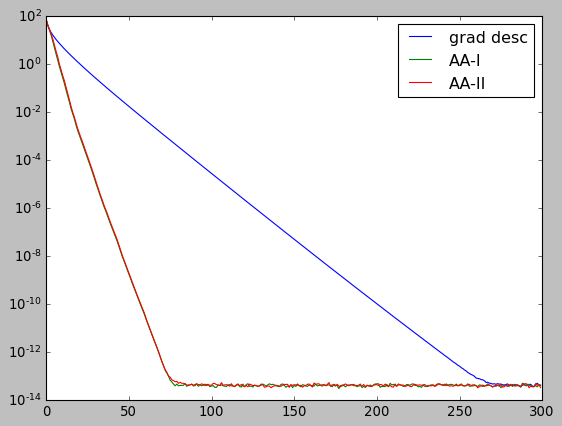

In [2]:
# Solving least squarse min_x ||Ax - b||^2

np.random.seed(123)

n = 100
m = 300
A = np.random.randn(m,n)
b = np.random.randn(m,1)
x_star = np.linalg.lstsq(A, b)[0]
f_star = 0.5 * (np.linalg.norm(A.dot(x_star) - b) ** 2)
N = 300
t = 0.002

gs_vanilla = []
gs_aa_1 = []
gs_aa_2 = []

x = np.zeros((n,1))
for i in range(N):
    x -= t * A.T.dot(A.dot(x) - b)
    gs_vanilla.append(np.linalg.norm( A.T.dot(A.dot(x) - b)))
    

aa_mem = 10

aa_wrk = aa.AndersonAccelerator(n, aa_mem, True, regularization=0)
x = np.zeros((n,1))
for i in range(N):
    if i > 0: aa_wrk.apply(x, x_prev)
    x_prev = np.copy(x)
    x -= t * A.T.dot(A.dot(x) - b)
    aa_wrk.safeguard(x, x_prev)
    gs_aa_1.append(np.linalg.norm( A.T.dot(A.dot(x) - b)))

aa_wrk = aa.AndersonAccelerator(n, aa_mem, False, regularization=0)
x = np.zeros((n,1))
for i in range(N):
    if i > 0: aa_wrk.apply(x, x_prev)
    x_prev = np.copy(x)
    x -= t * A.T.dot(A.dot(x) - b)
    aa_wrk.safeguard(x, x_prev)
    gs_aa_2.append(np.linalg.norm( A.T.dot(A.dot(x) - b)))

    
plt.semilogy(gs_vanilla, label='grad desc')
plt.semilogy(gs_aa_1, label='AA-I')
plt.semilogy(gs_aa_2, label='AA-II')

plt.legend()
plt.show()


====================== Type - I ======================
e-03, prev_norm_diff 3.3935e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.7011e-03, prev_norm_diff 3.3905e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6980e-03, prev_norm_diff 3.3875e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6922e-03, prev_norm_diff 3.3845e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6838e-03, prev_norm_diff 3.3815e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6727e-03, prev_norm_diff 3.3785e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6593e-03, prev_norm_diff 3.3755e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6436e-03, prev_norm_diff 3.3725e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6257e-03, prev_norm_diff 3.3695e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.6059e-03, prev_norm_diff 3.3665e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.5842e-03, prev_norm_diff 3.3636e-05
AA reset.
AA rejection, iter: 2, norm_diff 2.5609e-03, prev_norm_diff 3.3606e-05
AA reset.
AA rejection

AA rejection, iter: 2, norm_diff 3.8417e-01, prev_norm_diff 5.1499e-02
AA reset.
AA rejection, iter: 2, norm_diff 3.3367e-01, prev_norm_diff 5.0309e-02
AA reset.
AA rejection, iter: 2, norm_diff 3.0696e-01, prev_norm_diff 4.9303e-02
AA reset.
AA rejection, iter: 2, norm_diff 2.8410e-01, prev_norm_diff 4.8170e-02
AA reset.
AA rejection, iter: 2, norm_diff 3.3398e-01, prev_norm_diff 4.7185e-02
AA reset.
AA rejection, iter: 2, norm_diff 3.9243e-01, prev_norm_diff 4.6302e-02
AA reset.
AA rejection, iter: 2, norm_diff 4.0401e-01, prev_norm_diff 4.5492e-02
AA reset.
AA rejection, iter: 2, norm_diff 4.6613e-01, prev_norm_diff 4.4704e-02
AA reset.
AA rejection, iter: 2, norm_diff 4.4286e-01, prev_norm_diff 4.3886e-02
AA reset.
AA rejection, iter: 2, norm_diff 4.2256e-01, prev_norm_diff 4.3195e-02
AA reset.
AA rejection, iter: 2, norm_diff 4.0041e-01, prev_norm_diff 4.2450e-02
AA reset.
AA rejection, iter: 2, norm_diff 4.0563e-01, prev_norm_diff 4.1652e-02
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 8.8834e-01, prev_norm_diff 9.1248e-03
AA reset.
AA rejection, iter: 2, norm_diff 8.7604e-01, prev_norm_diff 9.1034e-03
AA reset.
AA rejection, iter: 2, norm_diff 8.6099e-01, prev_norm_diff 9.0824e-03
AA reset.
AA rejection, iter: 2, norm_diff 8.4412e-01, prev_norm_diff 9.0618e-03
AA reset.
AA rejection, iter: 2, norm_diff 8.2768e-01, prev_norm_diff 9.0416e-03
AA reset.
AA rejection, iter: 2, norm_diff 8.1378e-01, prev_norm_diff 9.0217e-03
AA reset.
AA rejection, iter: 2, norm_diff 8.0275e-01, prev_norm_diff 9.0022e-03
AA reset.
AA rejection, iter: 2, norm_diff 7.9516e-01, prev_norm_diff 8.9830e-03
AA reset.
AA rejection, iter: 2, norm_diff 7.9117e-01, prev_norm_diff 8.9641e-03
AA reset.
AA rejection, iter: 2, norm_diff 7.8958e-01, prev_norm_diff 8.9455e-03
AA reset.
AA rejection, iter: 2, norm_diff 7.9052e-01, prev_norm_diff 8.9271e-03
AA reset.
AA rejection, iter: 2, norm_diff 7.9388e-01, prev_norm_diff 8.9091e-03
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 2.0085e-01, prev_norm_diff 1.9261e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.1273e-01, prev_norm_diff 1.9233e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.2412e-01, prev_norm_diff 1.9205e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.3456e-01, prev_norm_diff 1.9178e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.4380e-01, prev_norm_diff 1.9151e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.5179e-01, prev_norm_diff 1.9125e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.5857e-01, prev_norm_diff 1.9099e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.6424e-01, prev_norm_diff 1.9074e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.6892e-01, prev_norm_diff 1.9048e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.7280e-01, prev_norm_diff 1.9024e-03
AA reset.
AA rejection, iter: 2, norm_diff 2.9637e-02, prev_norm_diff 1.8964e-03
AA reset.
AA rejection, iter: 2, norm_diff 3.1617e-02, prev_norm_diff 1.8884e-03
AA reset.
AA rejection, iter: 2, norm_

AA reset.
AA rejection, iter: 2, norm_diff 6.8127e-02, prev_norm_diff 8.5360e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.0030e-02, prev_norm_diff 8.5262e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.2511e-02, prev_norm_diff 8.5166e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.5538e-02, prev_norm_diff 8.5070e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.9091e-02, prev_norm_diff 8.4975e-04
AA reset.
AA rejection, iter: 2, norm_diff 8.3099e-02, prev_norm_diff 8.4882e-04
AA reset.
AA rejection, iter: 2, norm_diff 8.7470e-02, prev_norm_diff 8.4789e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.2115e-02, prev_norm_diff 8.4698e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.6942e-02, prev_norm_diff 8.4608e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.3124e-02, prev_norm_diff 8.4489e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.2837e-02, prev_norm_diff 8.4399e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.4953e-03, prev_norm_diff 8.4142e-04
AA reset.
AA rejection, iter

AA rejection, iter: 2, norm_diff 1.2112e-01, prev_norm_diff 5.4743e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.1837e-01, prev_norm_diff 5.4696e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.1555e-01, prev_norm_diff 5.4647e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.1269e-01, prev_norm_diff 5.4599e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.0980e-01, prev_norm_diff 5.4550e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.0690e-01, prev_norm_diff 5.4500e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.0403e-01, prev_norm_diff 5.4450e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.0124e-01, prev_norm_diff 5.4399e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.8564e-02, prev_norm_diff 5.4348e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.6031e-02, prev_norm_diff 5.4297e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.3679e-02, prev_norm_diff 5.4245e-04
AA reset.
AA rejection, iter: 2, norm_diff 9.1558e-02, prev_norm_diff 5.4193e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 4.1838e-02, prev_norm_diff 4.0958e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.1990e-02, prev_norm_diff 4.0914e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.2132e-02, prev_norm_diff 4.0869e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.2268e-02, prev_norm_diff 4.0825e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.2401e-02, prev_norm_diff 4.0780e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.2539e-02, prev_norm_diff 4.0736e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.0052e-02, prev_norm_diff 4.0677e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.1854e-02, prev_norm_diff 4.0601e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.9287e-02, prev_norm_diff 4.0541e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.1770e-02, prev_norm_diff 4.0485e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.2558e-02, prev_norm_diff 4.0431e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.2775e-02, prev_norm_diff 4.0378e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 6.9665e-02, prev_norm_diff 3.2538e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.1472e-02, prev_norm_diff 3.2512e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.3126e-02, prev_norm_diff 3.2486e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.4611e-02, prev_norm_diff 3.2461e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.5912e-02, prev_norm_diff 3.2435e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.7024e-02, prev_norm_diff 3.2410e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.7945e-02, prev_norm_diff 3.2386e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.8669e-02, prev_norm_diff 3.2361e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.9190e-02, prev_norm_diff 3.2336e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.9498e-02, prev_norm_diff 3.2312e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.9594e-02, prev_norm_diff 3.2287e-04
AA reset.
AA rejection, iter: 2, norm_diff 7.9479e-02, prev_norm_diff 3.2262e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 3.0400e-02, prev_norm_diff 2.7490e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.9575e-02, prev_norm_diff 2.7462e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.8809e-02, prev_norm_diff 2.7434e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.8111e-02, prev_norm_diff 2.7405e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.7486e-02, prev_norm_diff 2.7377e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.6930e-02, prev_norm_diff 2.7348e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.6444e-02, prev_norm_diff 2.7319e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.6027e-02, prev_norm_diff 2.7290e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.5683e-02, prev_norm_diff 2.7261e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.5419e-02, prev_norm_diff 2.7231e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.5249e-02, prev_norm_diff 2.7202e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.5096e-02, prev_norm_diff 2.7172e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 4.6385e-02, prev_norm_diff 2.2269e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.6766e-02, prev_norm_diff 2.2252e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.7105e-02, prev_norm_diff 2.2235e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.7403e-02, prev_norm_diff 2.2218e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.7657e-02, prev_norm_diff 2.2201e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.7863e-02, prev_norm_diff 2.2185e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.8023e-02, prev_norm_diff 2.2168e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.8134e-02, prev_norm_diff 2.2151e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.8195e-02, prev_norm_diff 2.2134e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.8206e-02, prev_norm_diff 2.2117e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.8166e-02, prev_norm_diff 2.2101e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.8074e-02, prev_norm_diff 2.2084e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 3.2969e-02, prev_norm_diff 1.8922e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4200e-02, prev_norm_diff 1.8908e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.5390e-02, prev_norm_diff 1.8894e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.6535e-02, prev_norm_diff 1.8880e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.7627e-02, prev_norm_diff 1.8867e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.8662e-02, prev_norm_diff 1.8853e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.9634e-02, prev_norm_diff 1.8839e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.0536e-02, prev_norm_diff 1.8826e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.1375e-02, prev_norm_diff 1.8813e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.2160e-02, prev_norm_diff 1.8799e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.2886e-02, prev_norm_diff 1.8786e-04
AA reset.
AA rejection, iter: 2, norm_diff 4.3548e-02, prev_norm_diff 1.8773e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 1.5444e-02, prev_norm_diff 1.6355e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.5245e-02, prev_norm_diff 1.6341e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.5027e-02, prev_norm_diff 1.6328e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.4792e-02, prev_norm_diff 1.6315e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.4542e-02, prev_norm_diff 1.6302e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.4278e-02, prev_norm_diff 1.6288e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.4002e-02, prev_norm_diff 1.6275e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.3725e-02, prev_norm_diff 1.6261e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.3449e-02, prev_norm_diff 1.6248e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.3171e-02, prev_norm_diff 1.6234e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.2891e-02, prev_norm_diff 1.6220e-04
AA reset.
AA rejection, iter: 2, norm_diff 1.2610e-02, prev_norm_diff 1.6207e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 2.0864e-02, prev_norm_diff 1.4076e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.1680e-02, prev_norm_diff 1.4068e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.2473e-02, prev_norm_diff 1.4060e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.3259e-02, prev_norm_diff 1.4052e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.4041e-02, prev_norm_diff 1.4044e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.4812e-02, prev_norm_diff 1.4036e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.5564e-02, prev_norm_diff 1.4029e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.6288e-02, prev_norm_diff 1.4021e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.6978e-02, prev_norm_diff 1.4014e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.7627e-02, prev_norm_diff 1.4006e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.8231e-02, prev_norm_diff 1.3999e-04
AA reset.
AA rejection, iter: 2, norm_diff 2.8785e-02, prev_norm_diff 1.3991e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 3.3816e-02, prev_norm_diff 1.0478e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4168e-02, prev_norm_diff 1.0473e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4466e-02, prev_norm_diff 1.0468e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4708e-02, prev_norm_diff 1.0462e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4892e-02, prev_norm_diff 1.0457e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.5019e-02, prev_norm_diff 1.0452e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.5087e-02, prev_norm_diff 1.0446e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.5097e-02, prev_norm_diff 1.0441e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.5048e-02, prev_norm_diff 1.0436e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4940e-02, prev_norm_diff 1.0430e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4775e-02, prev_norm_diff 1.0425e-04
AA reset.
AA rejection, iter: 2, norm_diff 3.4553e-02, prev_norm_diff 1.0420e-04
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 9.5321e-03, prev_norm_diff 9.1810e-05
AA reset.
AA rejection, iter: 2, norm_diff 9.9695e-03, prev_norm_diff 9.1743e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0408e-02, prev_norm_diff 9.1677e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0847e-02, prev_norm_diff 9.1612e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.1284e-02, prev_norm_diff 9.1547e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.1720e-02, prev_norm_diff 9.1482e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.2154e-02, prev_norm_diff 9.1418e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.2585e-02, prev_norm_diff 9.1355e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.3013e-02, prev_norm_diff 9.1293e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.3436e-02, prev_norm_diff 9.1230e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.3856e-02, prev_norm_diff 9.1169e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.4269e-02, prev_norm_diff 9.1108e-05
AA reset.
AA rejection, iter: 2, norm_

AA rejection, iter: 2, norm_diff 4.9545e-03, prev_norm_diff 8.1472e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.8346e-03, prev_norm_diff 8.1421e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.7380e-03, prev_norm_diff 8.1371e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.6509e-03, prev_norm_diff 8.1319e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.5553e-03, prev_norm_diff 8.1267e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.4517e-03, prev_norm_diff 8.1215e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.3406e-03, prev_norm_diff 8.1162e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.2226e-03, prev_norm_diff 8.1108e-05
AA reset.
AA rejection, iter: 2, norm_diff 4.0980e-03, prev_norm_diff 8.1054e-05
AA reset.
AA rejection, iter: 2, norm_diff 3.9675e-03, prev_norm_diff 8.1000e-05
AA reset.
AA rejection, iter: 2, norm_diff 3.8317e-03, prev_norm_diff 8.0945e-05
AA reset.
AA rejection, iter: 2, norm_diff 3.6911e-03, prev_norm_diff 8.0889e-05
AA reset.
AA rejection, iter: 2, norm_

AA reset.
AA rejection, iter: 2, norm_diff 5.6587e-03, prev_norm_diff 6.3038e-05
AA reset.
AA rejection, iter: 2, norm_diff 5.7192e-03, prev_norm_diff 6.2989e-05
AA reset.
AA rejection, iter: 2, norm_diff 5.7761e-03, prev_norm_diff 6.2939e-05
AA reset.
AA rejection, iter: 2, norm_diff 5.8293e-03, prev_norm_diff 6.2889e-05
AA reset.
AA rejection, iter: 2, norm_diff 5.8786e-03, prev_norm_diff 6.2838e-05
AA reset.
AA rejection, iter: 2, norm_diff 5.9239e-03, prev_norm_diff 6.2787e-05
AA reset.
AA rejection, iter: 2, norm_diff 5.9651e-03, prev_norm_diff 6.2736e-05
AA reset.
AA rejection, iter: 2, norm_diff 6.0022e-03, prev_norm_diff 6.2685e-05
AA reset.
AA rejection, iter: 2, norm_diff 6.0351e-03, prev_norm_diff 6.2633e-05
AA reset.
AA rejection, iter: 2, norm_diff 6.0638e-03, prev_norm_diff 6.2581e-05
AA reset.
AA rejection, iter: 2, norm_diff 6.0884e-03, prev_norm_diff 6.2529e-05
AA reset.
AA rejection, iter: 2, norm_diff 6.1088e-03, prev_norm_diff 6.2477e-05
AA reset.
AA rejection, iter

AA rejection, iter: 2, norm_diff 1.0662e-03, prev_norm_diff 4.5626e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0682e-03, prev_norm_diff 4.5588e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0707e-03, prev_norm_diff 4.5551e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0735e-03, prev_norm_diff 4.5514e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0768e-03, prev_norm_diff 4.5477e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.0780e-03, prev_norm_diff 4.5441e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.1007e-03, prev_norm_diff 4.5404e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.1504e-03, prev_norm_diff 4.5368e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.2231e-03, prev_norm_diff 4.5333e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.3146e-03, prev_norm_diff 4.5297e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.4213e-03, prev_norm_diff 4.5262e-05
AA reset.
AA rejection, iter: 2, norm_diff 1.5402e-03, prev_norm_diff 4.5228e-05
AA reset.
AA rejection, iter: 2, norm_

AA ====================== Type - II ======================


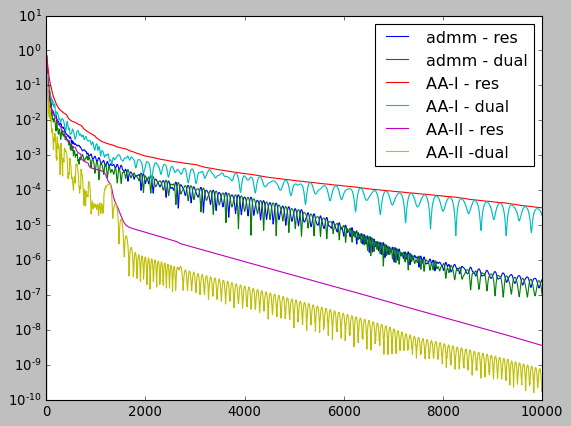

In [9]:
# l1 regularized least squares

np.random.seed(123)

n = 300
m = 100
mu = 0.1
rho = 0.1
N = 10_000

A = np.random.randn(m,n)
b = np.random.randn(m,1)

L = la.cho_factor(A.T.dot(A) + rho * np.identity(n))

def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t, 0)

 
z0 = np.linalg.solve(A.T.dot(A), A.T.dot(b))

z = z0
lam = np.zeros((n,1))
res_vanilla = []
ds_vanilla = []
for i in range(N):
    z_old = z
    x = la.cho_solve(L, rho * (z + lam) + A.T.dot(b))
    z = soft_thresh(x - lam, mu / rho)
    lam = lam - x + z
    res_vanilla.append(np.linalg.norm(x-z))
    ds_vanilla.append(np.linalg.norm(z - z_old))

    
aa_mem = 20

print("====================== Type - I ======================")
z = z0
lam = np.zeros((n,1))
u = np.vstack((z,lam))
aa_wrk = aa.AndersonAccelerator(2 * n, aa_mem, True, regularization=1e-8, safeguard_factor=1.0, verbosity=1)
res_aa_1 = []
ds_aa_1 = []
for i in range(N):
    if i > 0: aa_wrk.apply(u, u_old)
    u_old = np.copy(u)
    x = la.cho_solve(L, rho * (z + lam) + A.T.dot(b))
    z = soft_thresh(x - lam, mu / rho)
    lam = lam - x + z
    u = np.vstack((z, lam))
    aa_wrk.safeguard(u, u_old)
    z = u[:n]
    z_old = u_old[:n]
    lam = u[n:]
    
    res_aa_1.append(np.linalg.norm(la.cho_solve(L, rho * (z + lam) + A.T.dot(b)) - z))
    ds_aa_1.append(np.linalg.norm(z - z_old))

print("====================== Type - II ======================")
z = z0
lam = np.zeros((n,1))
u = np.vstack((z,lam))
aa_wrk = aa.AndersonAccelerator(2 * n, aa_mem, False, regularization=1e-10, safeguard_factor=1.0, verbosity=1)
res_aa_2 = []
ds_aa_2 = []
for i in range(N):
    if i > 0: aa_wrk.apply(u, u_old)
    u_old = np.copy(u)
    x = la.cho_solve(L, rho * (z + lam) + A.T.dot(b))
    z = soft_thresh(x - lam, mu / rho)
    lam = lam - x + z
    u = np.vstack((z, lam))
    aa_wrk.safeguard(u, u_old)
    z = u[:n]
    z_old = u_old[:n]
    lam = u[n:]
    
    res_aa_2.append(np.linalg.norm(la.cho_solve(L, rho * (z + lam) + A.T.dot(b)) - z))
    ds_aa_2.append(np.linalg.norm(z - z_old))


plt.semilogy(res_vanilla, label='admm - res')
plt.semilogy(ds_vanilla, label='admm - dual')
plt.semilogy(res_aa_1, label='AA-I - res')
plt.semilogy(ds_aa_1, label='AA-I - dual')
plt.semilogy(res_aa_2, label='AA-II - res')
plt.semilogy(ds_aa_2, label='AA-II -dual')
#plt.semilogy(res_aa_1_p, label='AA-I-P - res')
#plt.semilogy(ds_aa_1_p, label='AA-I-P - dual')

plt.legend()
plt.show()